У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt # or  import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '../data/yulu_rental.csv'
df = pd.read_csv(data_path)

In [3]:
df[:5]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?



    З графіку відслідковується що переважна більшість поїздок виконується в гарну погоду (1) та при вологості від 20 до 60. Також помітно шо при погіршенні погодних умов збільшується вологість повітря
    Є викиди при значення вологості 0. Також є невелика кількість користувачів при вологості 95 та 100.
    так як переважна більшість поїздок в виконується в хорошу погоду треба розглянути можливість збільшення кількості велосипедів під час такої погоди
    Також можливо розглянути можливість оснащення велосипедів протитуманними фарами для збільшення поїздок під час умовних погод 2 де є туман

    
    

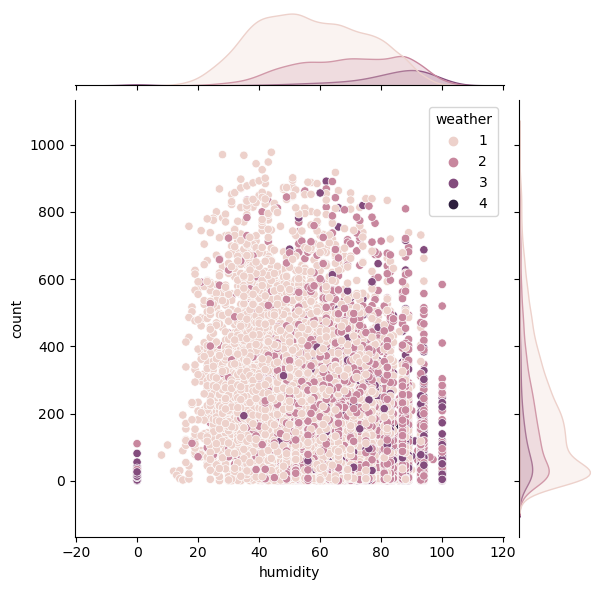

In [4]:
sns.jointplot(data=df, x="humidity", y="count", hue="weather");

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [5]:
season_2 = df.query('season == 1 | season == 2')
season_2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8146,2012-06-19 19:00:00,2,0,1,1,32.80,38.635,59,15.0013,82,432,514
8147,2012-06-19 20:00:00,2,0,1,1,32.80,37.880,55,16.9979,59,399,458
8148,2012-06-19 21:00:00,2,0,1,1,31.16,35.605,62,11.0014,37,239,276
8149,2012-06-19 22:00:00,2,0,1,1,29.52,34.850,79,6.0032,51,240,291



По графіку прослідковується лінійна залежність на початку графіку - кількість зареєстрованих і незареєстрованих користувачів рівномірно зростає до значень приблизно 220 для зареєстрованих і 100 для незареєстрованих в обидна сезони. Тобто можно сказати шо навесні і влітку співвідношення зареєстрованих до незареєстрованих 2:1
Далі спостерігається розподіл в двох напрямках
на першому  видно шо при зростанні зареєстрованих користувачів кількість незареєстрованих залишається на позначці до 150
на другому кількість зареєстрованих залишається на 400 але при цьому зростає кількість незареєстрованих
по розподілу по сезонам видно що також до 200 зареєстрованих і 100 незареєстрованих кількість приблизно однакова, а далі переважає літній сезон
але є помітна лінія на весні де спостерігається шо кількість незареєстрованих майже нуль при тому шо зареєстрованих до 600


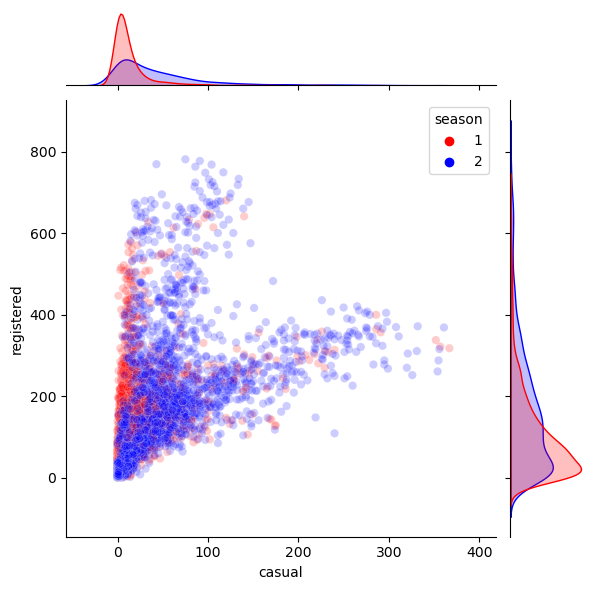

In [10]:
sns.jointplot(data=season_2, x="casual", y="registered", hue="season", alpha = 0.2, palette=['red','blue']);

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


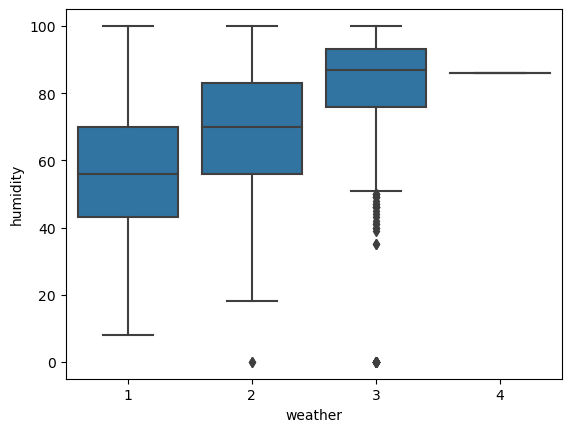

In [20]:
sns.boxplot(data=df, x="weather", y="humidity", color="tab:blue");

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [36]:
filter = df[['casual', 'registered', 'count', 'workingday']]
filter

,casual,registered,count,workingday
0,3,13,16,0
1,8,32,40,0
2,5,27,32,0
3,3,10,13,0
4,0,1,1,0
...,...,...,...,...
10881,7,329,336,1
10882,10,231,241,1
10883,4,164,168,1
10884,12,117,129,1


In [4]:
import warnings
warnings.filterwarnings('ignore')

По графіку відслідковується шо кількість зареєстрованих відносно загальної кількості знижується в вихідні дні, якщо в робочі дні графік лінійно зростає то в вихідні кількість зупиняється на позначці 500
В випадку з незареєстрованими то в будні дні кількість до 200 відносно загальної кількості велосипедів, а в вихідні зростає до 400
Приблизно така сама ситуація між зареєстрованими і незареєстрованими. в буні розподіл між ними 800 зареєстрованих і  до 200 незареєстрованих, тоді як в вихідні кількість незареєстрованих зростає до 400 а зареєстрованих залишається на 400
Тобто можно зробити висновок що на вихідні зростає кількість незареєстрованих користувачів


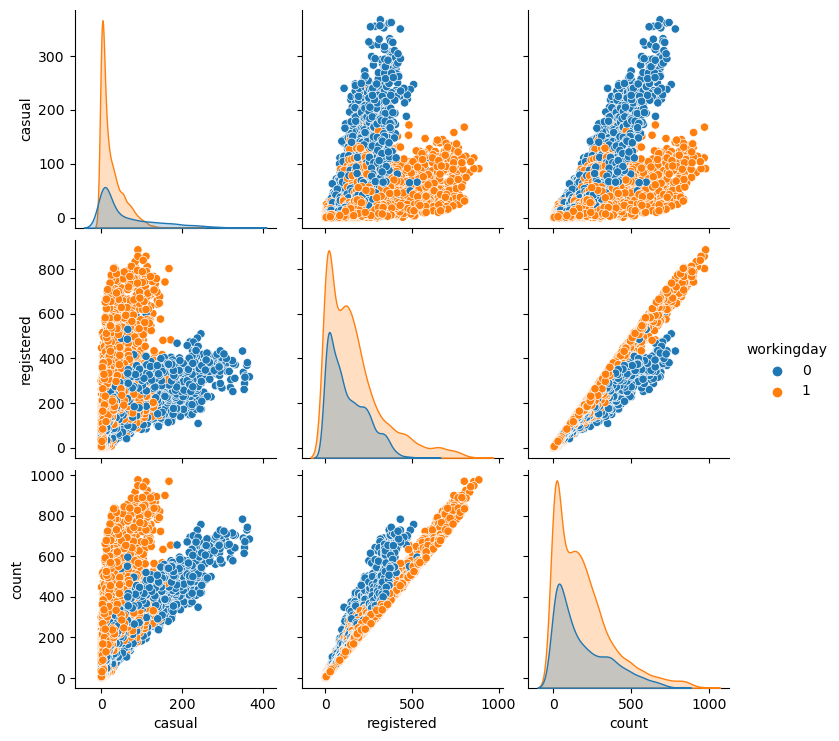

In [37]:
sns.pairplot(data=filter, hue="workingday");

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [5]:
df['datetime'] = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [6]:
df['date'] = df.datetime.dt.date

In [7]:
df_viz = df[['date', 'registered', 'casual']]

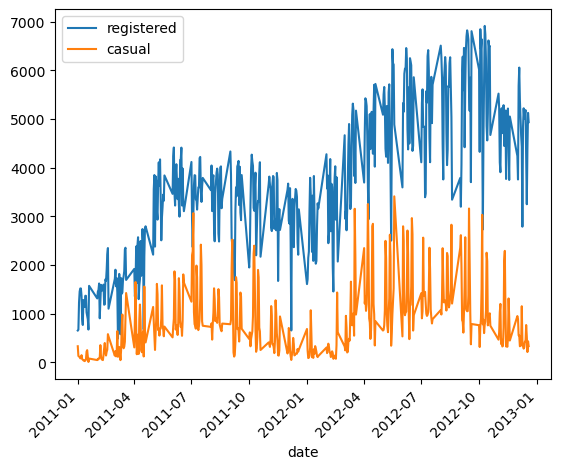

In [9]:
plot = df_viz.groupby("date").sum().plot()
plt.xticks(rotation=45, ha='right');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
